# DSC530 Final Project: Early Data Analysis on Hazardous Asteroids
# Rahul Rajeev

**Objective:** To perform some early data analysis on Asteroid Data that have been classified as hazardous and nonhazardous to impact on Earth. 

**Summary:** Potentially Hazardous Asteroids or PHAs are classfied based on parameters that measure it's potential to make dangerously close approaches to the Earth. All asteroids with an Earth Minimum Orbit Intersection Distance (MOID) of 0.05 AU (astronomical units) or less and an absolute magnitude (unitless) of 22 or less are considered PHAs. Asteroids that don't fit under these conditions and smaller than 140 m in diameter are not considered PHAs. 

In [2]:
# importing packages
import scipy.stats
import numpy as np
import thinkstats2
import thinkplot
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

The dataset can be found at this link: 
https://www.kaggle.com/datasets/shrushtijoshi/asteroid-impacts.

In [3]:
# reading the dataset
orbit_df = pd.read_csv('orbits.csv')

In [4]:
orbit_df.head()

,Object Name,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Classification,Hazardous
0,433 Eros,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,Amor Asteroid,False
1,719 Albert,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,Amor Asteroid,False
2,887 Alinda,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,Amor Asteroid,False
3,1036 Ganymed,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,Amor Asteroid,False
4,1221 Amor,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,Amor Asteroid,False


# Ch 1 - Choosing and Describing Variables

There are many variables in this data set from the object name to its MOID, but for this analysis, we will be focusing on five specifically. The orbit distance, Asteroid Magnitude, Minimum Orbit Intersection Distance (MOID), Mean Anomoly, and Orbital Period.

**Explanations:**
- Orbit: describes the orbit distance from the Sun in astronomical units (AU)
- Asteroid Magnitude: the visual brightness of the asteroid if measured 1 AU
- Mean Anomaly: the mean angle between the asteroid orbit and earth orbit
- Minimum Orbit Intersection Distance: how close the orbit of the asteroid will come into Earth's orbit
- Orbital Period: how many years it will take for the asteroid to complete one orbit

**Q:** Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

In [5]:
# splitting the dataset by characteristics

orbit = orbit_df['Orbit Axis (AU)']
magnitudes = orbit_df['Asteroid Magnitude']
mean_anomaly = orbit_df['Mean Anomoly (deg)']
moid = orbit_df['Minimum Orbit Intersection Distance (AU)']
period = orbit_df['Orbital Period (yr)']


# Ch 2 - Plotting Histograms, Outliers, and Descriptive Statistics

### Orbit

Text(0, 0.5, 'Frequency')

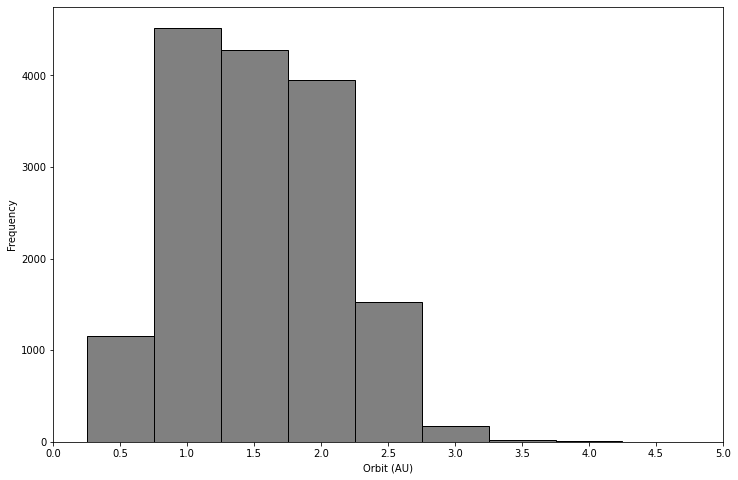

In [6]:
# Orbit Histogram

# figure size
plt.figure(figsize = (12,8))

# histogram function with appropriate bins to contain main distribution
plt.hist(orbit, bins = np.linspace(0,5,11), color = 'grey', edgecolor = 'black', linewidth = 1, align = 'left')

# tick markers and limiting the distribution range to show data
plt.xticks(np.linspace(0,5,11))
plt.xlim(0,5)

# labels
plt.xlabel('Orbit (AU)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Orbit(AU)')

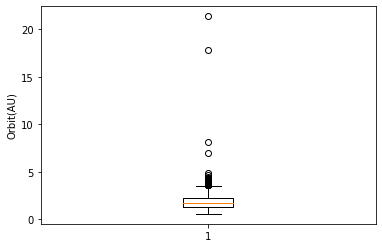

In [7]:
# Finding outliers
plt.boxplot(orbit)
plt.ylabel('Orbit(AU)')

As evident by the boxplot, there are quite a bit of outliers outside the main IQR of the dataset. The reason why there are so many outliers outside of the main distribution above 4.5 au is because its very hard to detect asteroids outside of this range. And when it is possible given the certain minimum orbit intersection distance, the asteroids could be on varying orbit lengths around the Sun.

In [8]:
# Summary Statistics
orbit.describe()

count    15635.000000
mean         1.781002
std          0.603229
min          0.547600
25%          1.323600
50%          1.735500
75%          2.208650
max         21.395400
Name: Orbit Axis (AU), dtype: float64

By using the built in describe function from pandas, I found the mean orbit distance to be 1.78 AU, the standard deviation to be 0.60 au, min to be 0.54 AU and the max to be 21.39 AU. Values between 21.39 and the right end of the distribution since the mean is 1.78 AU should be considered outliers. The 75th quantile is at 2.2, which means a majority of the data is within a smaller orbit distance.

In [9]:
orbit.skew(), orbit.kurtosis()

(3.767753181592225, 103.60888561655565)

Skewness is above 1, which means highly skewed left and the kurtosis is large and heavy tailed. The distribution is seen to be peaked on the left with outliers past the main distribution from 4.5 AU out to the max of 21.4 AU. 

### Magnitude

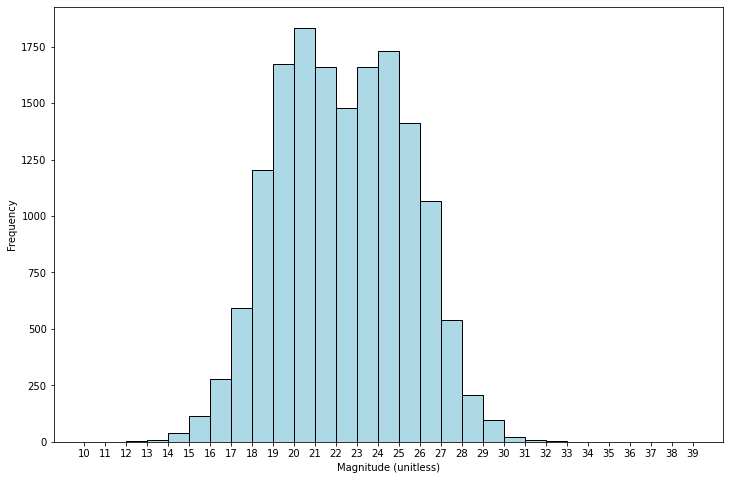

In [10]:
# Magnitude Histogram

# figure size
plt.figure(figsize = (12,8))

# histogram function
plt.hist(magnitudes, bins = [*range(10,40,1)], color = 'lightblue', edgecolor = 'black', linewidth = 1)

#creating ticks that work for the set of values we have
xticks = [*range(10,40,1)]
plt.xticks(ticks=xticks)

# labels
plt.xlabel('Magnitude (unitless)')
plt.ylabel('Frequency')

# show figure
plt.show()

Text(0, 0.5, 'Magnitude')

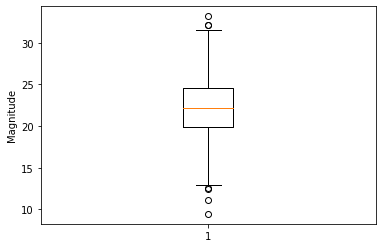

In [11]:
# was having issues with the boxplot and found the issue to having NaN values, I dropped them
new_mag = magnitudes.dropna()

# a helper function that let me know if there was anymore NaN values
if np.isnan(new_mag).any():
    print("There are NaN values")

plt.boxplot(new_mag)
plt.ylabel('Magnitude')

There are a couple of outliers outside the main IQR. But they aren't very large outliers, and still seem to fit the main distribution. Just to make sure, I calculated upper and lower fences which is given by a +/- of 7.05 to the first and third quartile. The minimum is 3 below the lower fence, and the max is 2 above the upper fence. The outliers aren't far off, so even though they are by definition an outlier, they seem to fit the distribution as mentioned before. These 'outliers' will not have a scientific explanation as they are realistic values for the apparent value of an asteroid, being dim or bright. 

In [12]:
# Summary Statistics
new_mag.describe()

count    15634.000000
mean        22.286336
std          3.016002
min          9.450000
25%         19.900000
50%         22.200000
75%         24.600000
max         33.200000
Name: Asteroid Magnitude, dtype: float64

I found the mean magnitude to be 22.28, the standard deviation to be 3.01, min to be 9.45 and the max to be 33.2.

In [13]:
# Skew and Kurtosis
new_mag.skew(), new_mag.kurtosis()

(0.025448569057983577, -0.6081709177047201)

Since the skewness is between -0.5 and 0.5, the data is fairly symmetrical, almost bimodal. It's not skewed at all, and the kurtosis is negative which implies the data is moderately centered with a peak and light tailed.

### Mean Anomaly

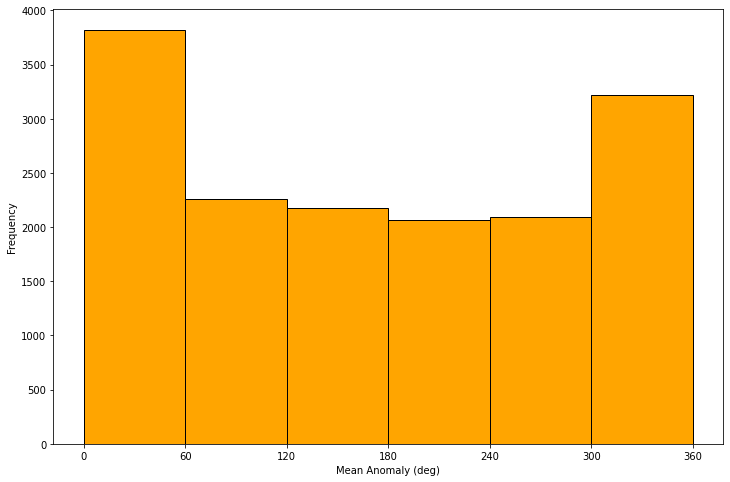

In [14]:
# Mean Anomaly Distribution

# figure size
plt.figure(figsize = (12,8))

# histogram with appropriate binning
plt.hist(mean_anomaly, bins = [*range(0,380,60)], color = 'orange', edgecolor = 'black', linewidth = 1)

# x tick labels
xticks = [*range(0,380,60)]
plt.xticks(ticks=xticks)

# labels
plt.xlabel('Mean Anomaly (deg)')
plt.ylabel('Frequency')

# show
plt.show()

Text(0, 0.5, 'Mean Anomaly')

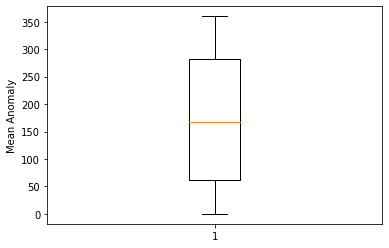

In [15]:
# finding outliers

plt.boxplot(mean_anomaly)
plt.ylabel('Mean Anomaly')

From the boxplot, it is evident that there are no outliers. All the data is contained within the quartiles and the distribution is pretty even. Let's take a look at the summary statistics.

In [16]:
# Summary statistics
mean_anomaly.describe()

count    15635.000000
mean       172.834863
std        116.123065
min          0.003100
25%         62.040250
50%        167.750200
75%        281.443100
max        359.998200
Name: Mean Anomoly (deg), dtype: float64

I found the mean mean anomaly to be 172.83 deg, the standard deviation to be 116.12, min to be 0.003 and the max to be 359.99. It would make sense for the standard deviation to be large because the distribution appears to be symmetrical and bimodal, where most of the data is between either 0 and 60 degrees to 300 and 360 degrees. Scientifically it just represents the wide range of mean anomalies for asteroids being either on the same plane as the Earth's orbit around the sun or just a degree under a full counterclockwise rotation. Since there is no set of values being negative, all angles are based on one full rotation from 0 to 360, and including 360 wouldn't be necessary. 

In [17]:
# Skewness and Kurtosis
mean_anomaly.skew(), mean_anomaly.kurtosis()

(0.08910527048683267, -1.3737076986810797)

Similar to Magnitudes, the skew is between -0.5 and 0.5, which means that the distribution is highly symmetric, peaked, and appears to be bimodal. The kurtosis is negative which means that the data is heavy peaked and trailing tails, if any tails at all. This distribution actually appears to not have a tail.

### Minimum Orbit Intersection Distance (MOID)

Text(0, 0.5, 'Frequency')

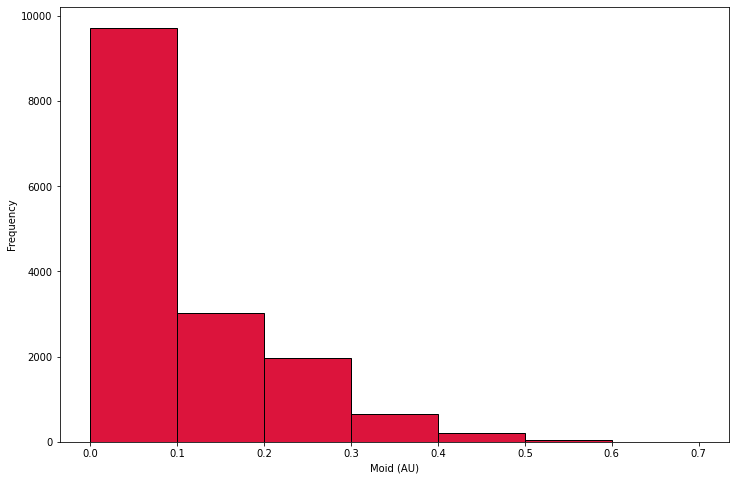

In [18]:
# MOID Histogram

# figure size
plt.figure(figsize = (12,8))

# histogram function with appropriate bins to contain main distribution
plt.hist(moid, bins = np.linspace(0,0.8,8, endpoint=False), color = 'crimson', edgecolor = 'black', linewidth = 1)

# tick markers and limiting the distribution range to show data
plt.xticks(np.linspace(0,0.8,8, endpoint=False))

# labels
plt.xlabel('Moid (AU)')
plt.ylabel('Frequency')

Text(0, 0.5, 'MOID (AU)')

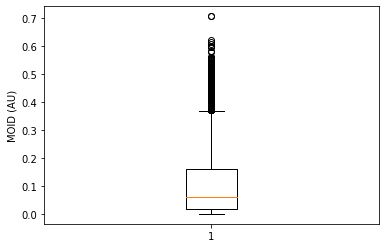

In [19]:
# box and whisker
plt.boxplot(moid)
plt.ylabel('MOID (AU)')

There are many points past the IQR in this distribution, but it is very densily packed so it still fits the distribution. Since the data is densely packed there isn't a scientific explanation to explain why these could be outliers because they still fit the general shape. Although having MOIDs greater than 0.5 might not pose a risk to Earth. 

In [20]:
# Summary statistics
moid.describe()

count    15635.000000
mean         0.101884
std          0.105937
min          0.000000
25%          0.018700
50%          0.062000
75%          0.159150
max          0.706900
Name: Minimum Orbit Intersection Distance (AU), dtype: float64

I found the mean moid to be 0.101 AU, the standard deviation to be 0.11 au , min to be 0.000? and the max to be 0.71. The minimum being 0.0000 could either be a misinput or the datapoint being so small, that pandas cut off the decimal point. It might be worth when performing analysis to format the decimal points such that more are shown. The 75th quantile is at 0.159, and the upper fence is about 0.45, so all the moids greater than this are considered to be outliers by technicality. MOIDs greater than this point are definitely not as dangerous as the majority of of the asteroids within the first to second quantile.

In [21]:
# skew and kurtosis
moid.skew(), moid.kurtosis()

(1.3291743481896083, 1.4470780868180704)

Skewness is greater than 1 which means that it is positively skewed to the left, and the kurtosis is still less than 3, which means that the data is relatively distributed evenly and has a peak of values with light tails. 

### Orbital Period

Text(0, 0.5, 'Frequency')

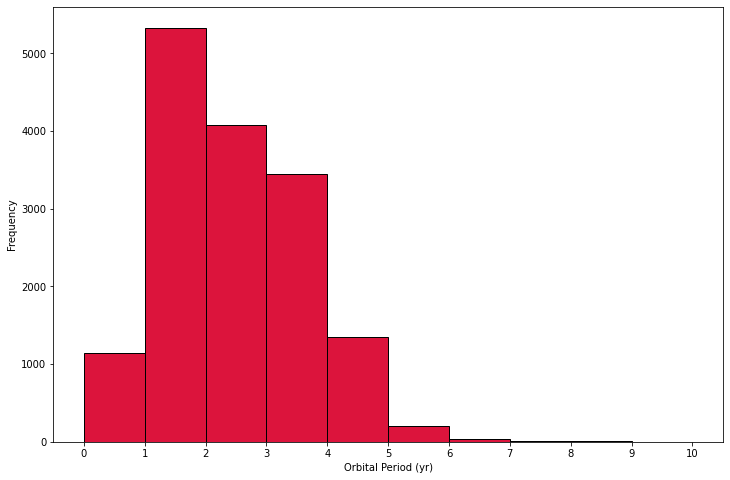

In [22]:
# Period Histogram

# figure size
plt.figure(figsize = (12,8))

# histogram function with appropriate bins to contain main distribution
plt.hist(period, bins=np.linspace(0,11,11, endpoint=False),  color = 'crimson', edgecolor = 'black', linewidth = 1)

# tick markers and limiting the distribution range to show data
plt.xticks(np.linspace(0,11,11, endpoint=False))

# labels
plt.xlabel('Orbital Period (yr)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Orbital Period (yr)')

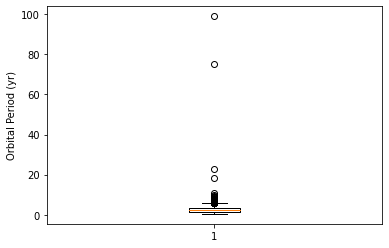

In [23]:
# box and whisker
plt.boxplot(period)
plt.ylabel('Orbital Period (yr)')

This distribution has many outliers, going out to a max of close to a 100 years. The outliers here could mean that some of the asteroids have highly elliptical orbits which if you understand how elliptical orbits, the asteroids travel a lot slower along the ends that are away from the Sun, which means they have longer orbital periods even up to a 100 years. These are not calculation errors and are most likely intentional. 

In [24]:
# Summary statistics
period.describe()

count    15635.000000
mean         2.473406
std          1.517588
min          0.410000
25%          1.520000
50%          2.290000
75%          3.280000
max         98.970000
Name: Orbital Period (yr), dtype: float64

I found the mean period to be 2.47 years, the standard deviation to be 1.52 yr, min to be 0.41 and the max to be 98.97. The upper fence is going to be 5.1, so there are a lot of asteroids with an orbital period larger than that. 

In [25]:
# skew and kurtosis
period.skew(), period.kurtosis()

(24.006244267089816, 1384.9260656510478)

Skewness is much greater than 1 which means that the data is highly skewed to the left, as evident by all the outliers on the right. The kurtosis is larger than 3 which means that the data is heavy tailed and small peaked, which means that a lot of the data is also contained on the right end ofthe distribution, towards the outliers.

## Ch 3 - PMF comparing MOID PMFs of different types of Asteroids

Text(0, 0.5, '')

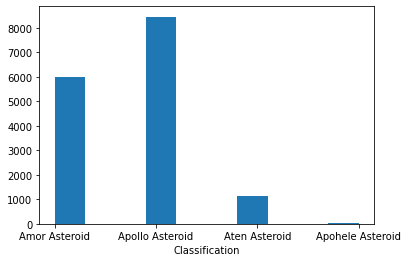

In [26]:
# Looking at the different counts of Classification and using the two most common for pmfs
classification = orbit_df['Classification']
plt.hist(classification)
plt.xlabel('Classification')
plt.ylabel('')

In [27]:
# loading amor dataset
amor = orbit_df[orbit_df['Classification'] == 'Amor Asteroid']
amor.head()

,Object Name,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Classification,Hazardous
0,433 Eros,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,Amor Asteroid,False
1,719 Albert,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,Amor Asteroid,False
2,887 Alinda,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,Amor Asteroid,False
3,1036 Ganymed,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,Amor Asteroid,False
4,1221 Amor,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,Amor Asteroid,False


In [28]:
# loading apollo dataset
apollo = orbit_df[orbit_df['Classification'] == 'Apollo Asteroid']
apollo.head()

,Object Name,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Classification,Hazardous
5,1566 Icarus,57800,1.0781,0.8269,22.8255,31.3830,88.0107,215.5288,0.1867,1.97,1.12,0.0345,100,16.90,Apollo Asteroid,True
7,1620 Geographos,57800,1.2453,0.3353,13.3375,276.8930,337.2080,104.1556,0.8277,1.66,1.39,0.0307,449,15.60,Apollo Asteroid,True
9,1685 Toro,54520,1.3673,0.4359,9.3807,127.0826,274.3396,48.6229,0.7713,1.96,1.60,0.0504,355,14.23,Apollo Asteroid,False
10,1862 Apollo,55432,1.4702,0.5599,6.3533,285.8625,35.7319,275.7827,0.6471,2.29,1.78,0.0256,276,16.25,Apollo Asteroid,True
11,1863 Antinous,57800,2.2594,0.6062,18.3989,267.9955,346.4862,81.5233,0.8897,3.63,3.40,0.1831,156,15.54,Apollo Asteroid,False


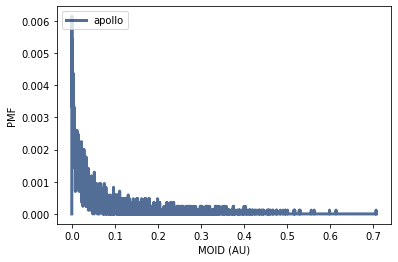

<Figure size 864x576 with 0 Axes>

In [39]:
# Apollo PMF
apollo_moid = apollo['Minimum Orbit Intersection Distance (AU)']
apollo_pmf = thinkstats2.Pmf(apollo_moid, label="apollo")
thinkplot.Pmf(apollo_pmf)
thinkplot.Config(xlabel='MOID (AU)', ylabel='PMF', loc='upper left')
thinkplot.Figure(figsize = (12,8))

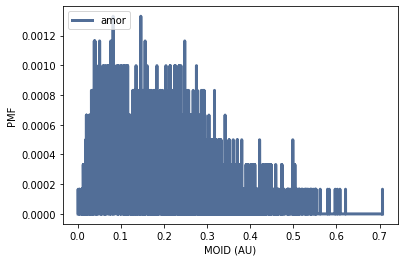

<Figure size 864x576 with 0 Axes>

In [40]:
# Amor PMF
amor_moid = amor['Minimum Orbit Intersection Distance (AU)']
amor_pmf=thinkstats2.Pmf(amor_moid, label = 'amor')
thinkplot.Pmf(amor_pmf)
thinkplot.Config(xlabel='MOID (AU)', ylabel='PMF', loc='upper left')
thinkplot.Figure(figsize = (12,8))

## Ch 4 - CDF of Magnitudes

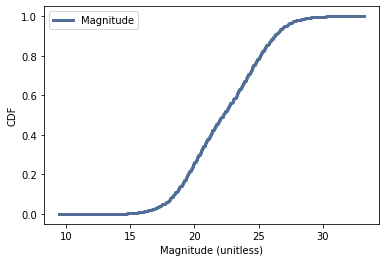

In [37]:
# cdf of magnitudes, using thinkplot functions
cdf = thinkstats2.Cdf(magnitudes, label='Magnitude')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Magnitude (unitless)', ylabel='CDF', loc='upper left')

**Interpretation:** The CDF of magnitudes appears to be a smooth S-Curve CDF with equal amounts above and below the 45-degree straight line. This CDF indicates a symmetrical and somewhat like a bell- or mound-shaped curve around the peak of magnitudes which appears to be around 22. This means that majority of asteroids are within 20 - 25 magnitude brightness, and the rest of the values are in the tails of the data. 

## Ch 5 - Analytical Distribution to check CDF of MOID has an Exponential Distribution

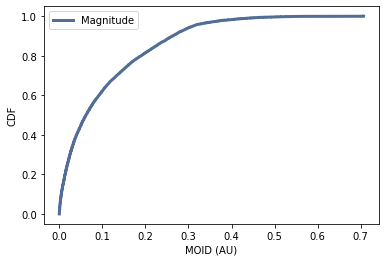

In [41]:
# cdf of moid using thinkplot and thinkstats
cdf = thinkstats2.Cdf(moid, label='Magnitude')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='MOID (AU)', ylabel='CDF', loc='upper left')

The CDF of MOID seems to imply that it has an exponential distribution. But we can check this by plotting the complement of the CDF, and checking whether it is a straight line.

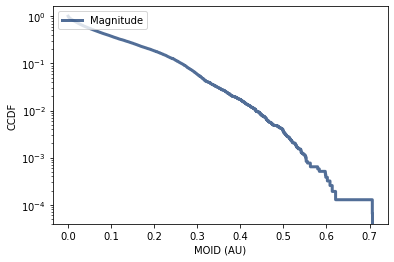

In [42]:
# plotting the complement, which is an analytical distribution, and setting the scale to be log
thinkplot.Cdf(cdf, complement = True)
thinkplot.Config(xlabel='MOID (AU)', ylabel='CCDF', yscale = 'log', loc='upper left')

**Interpretation:** The complement CDF doesn't appear to be exactly a straight line, but it does seem to follow a linear path with slight curvature up to 0.6 moid, where it makes a distinct departure from the rest of the trend. This means that although the CDF of the MOID appeared to resemble a exponential distribution, an exponential distribution wouldn't be the best fit for this data. 

In terms of the implications of this relationship, is that there appears to be an almost linear number of asteroids at each distance, which means that asteroids that orbit and potentially become PHAs can be of varying MOIDs.

## Ch 7 - Scatter Plots comparing two variables, Correlation vs Causation
## Covariance, Pearson’s correlation, and Non-Linear Relationships

In [1]:
# loading functions to be used in this section
# covariance
def Covariance(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

# pearson correlation calculation
def PearCorr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Covariance(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

# spearman correlation calculation
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

### Compare Orbit distance and magnitude

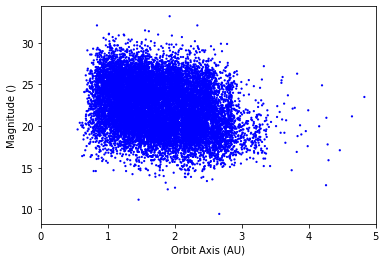

In [51]:
# creating scatter plot and limiting the data to the main region of orbit axis, 0 to 5 AU
thinkplot.Scatter(orbit, magnitudes, alpha=1.0, s=5)
thinkplot.Config(xlabel='Orbit Axis (AU)',
                 ylabel='Magnitude ()',
                xlim = [0,5])

In [57]:
# calculating covariacne and Pearson's coefficient for linear correlation
Covariance(orbit, magnitudes), PearCorr(orbit, magnitudes)

(nan, nan)

In [59]:
# calculating spearman correlation for non-linear correlation
SpearmanCorr(orbit, magnitudes)

-0.25915921775067385

**Interpretation:**
There appears to be no linear correlation or covariance between orbit distance and magnitude, and the spearman correlation constant records a negative number, which could imply a slight negative non-linear correlation between the data, but nothing too serious. This is good because when creating a model of regression using the parameters, there is no collinearity between data that could affect the model. 

### Compare Mean Anomaly and Period

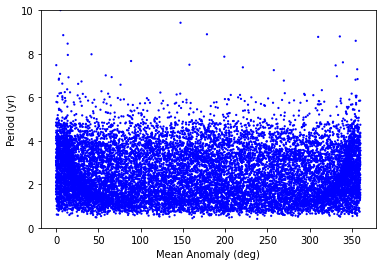

In [64]:
# creating scatter plot and limiting the data to the main region of periods from 0 to 10 years.
thinkplot.Scatter(mean_anomaly, period, alpha=1.0, s=5)
thinkplot.Config(xlabel='Mean Anomaly (deg)',
                 ylabel='Period (yr)',
                ylim = [0, 10])

In [65]:
# calculating covariacne and Pearson's coefficient for linear correlation
Covariance(mean_anomaly, period), PearCorr(mean_anomaly, period)

(nan, nan)

In [66]:
# calculating spearman correlation for non-linear correlation
SpearmanCorr(mean_anomaly, period)

-0.0481901433630035

**Interpretation:**
There appears to be no linear correlation or covariance between mean anomaly and period, and the spearman correlation constant records a negative number, which could imply a slight negative non-linear correlation between the data, but nothing too serious. This is good because when creating a model of regression using the parameters, there is no collinearity between data that could affect the model. 

## Ch 9 - Running a Test

My goal for the EDA on this particular dataset was to make sure that there is no collinearity between parameters assigned to the binary logistic model I would use to predict whether an asteroid is potentially hazardous or not. So one of the tests I could conduct is to check whether the observed correlation between orbit distance and magnitude, or in general, any two parameters is statistically significant.

**Null:** There is correlation between the variables in the dataset.

**Alternative:** There is no correlation between the variables in the dataset, implying no multicollinearity, and therefore, a regression model would fit the data accordingly.

**Significance Level:** 0.05.

In [67]:
# Thinkstats Hypothesis Test Class and it's internal functions

class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [72]:
# creating the data object, making sure that orbit distance is x, and magnitude is y
data = orbit, magnitudes
# running the correlation test and gathering hat value
ht = CorrelationPermute(data)
# calculating p value from hat value
pvalue = ht.PValue()
pvalue

0.0

**Interpretation:** Since the p-value is smaller than the chosen significance level of 0.05, that means that the null hypothesis is rejected, and there is no correlation between the variables in the dataset, therefore implying no collinearity between magnitude and orbit distance. I could run this hypothesis test across all pairs of variables to double check whether this is true. 

## Ch 10/11 - Creating a Binary Logistic Model that predicts PHAs based off the parameters

In [73]:
import statsmodels.formula.api as smf

In [109]:
# creating a dataframe from the columns called above and adding a new one that describes the hazardous
pha = orbit_df['Hazardous']
new_df = pd.DataFrame({'orbit': orbit, 'magnitudes': magnitudes, 'mean_anomaly': mean_anomaly, 'moid': moid, 
                       'period': period, 'pha': pha})
new_df.head()

,orbit,magnitudes,mean_anomaly,moid,period,pha
0,1.4579,11.16,319.3111,0.1492,1.76,False
1,2.6385,15.50,224.5535,0.2004,4.29,False
2,2.4787,13.40,351.3730,0.0925,3.90,False
3,2.6628,9.45,92.5640,0.3421,4.35,False
4,1.9191,17.70,313.7379,0.1068,2.66,False


In [110]:
# replacing string true false values with numerical binary values instead, so the binary logistic model can read the values
new_df.replace({False: 0, True: 1}, inplace=True)
new_df.head()
name_df['pha'] = pd.to_numeric(name_df['pha'])
name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15635 entries, 0 to 15634
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Object Name                15635 non-null  object 
 1   Epoch (TDB)                15635 non-null  int64  
 2   orbitaxis                  15635 non-null  float64
 3   Orbit Eccentricity         15635 non-null  float64
 4   Orbit Inclination (deg)    15635 non-null  float64
 5   Perihelion Argument (deg)  15635 non-null  float64
 6   Node Longitude (deg)       15635 non-null  float64
 7   Mean Anomoly (deg)         15635 non-null  float64
 8   Perihelion Distance (AU)   15635 non-null  float64
 9   Aphelion Distance (AU)     15635 non-null  float64
 10  period                     15635 non-null  float64
 11  moid                       15635 non-null  float64
 12  Orbital Reference          15635 non-null  int64  
 13  magnitude                  15634 non-null  flo

In [114]:
# creating a formula to run the model
formula = 'pha ~ orbit + magnitudes + mean_anomaly + moid + period'
model = smf.logit(formula, data=new_df)
# finding the results
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.102382
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    pha   No. Observations:                15634
Model:                          Logit   Df Residuals:                    15628
Method:                           MLE   Df Model:                            5
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                  0.7111
Time:                        01:24:20   Log-Likelihood:                -1600.6
converged:                       True   LL-Null:                       -5540.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       33.6607      0.916     36.763      0.000      31.866      35.455
orbit           -0.2190      0.275     -0.795      0.427      -0.759       0.321
magnitudes      -1.4380      0.037    -38.884      0.000      -1.510      -1.365
mean_anomaly    -0.0001      0.000     -0.275      0.783      -0.001       0.001
moid          -108.2778      3.153    -34.344      0.000    -114.457    -102.099
period           0.0052      0.123      0.042      0.966      -0.236       0.246
================================================================================

Possibly complete quasi-separation: A fraction 0.39 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Interpretation:** Out of the 5 variables I chose to perform EDA, the two that were statistically significant towards building the binary logistic regression model were the magnitudes and the minimum orbit intersection distance. The others were not even close to being statistically significant. I could repeat this entire EDA to check out the other variables, make sure there is no collinearity, before fitting them to the model to see whether any additional parameters could make the model better. When working on the same dataset for DSC520, I found that albedo and the diameter of the asteroid also played a small part in terms of determining whether the asteroid is potentially hazardous, but I will leave that analysis for another day.

In [116]:
# going for a prediction, separating endog and exog
endog = pd.DataFrame(model.endog, columns=[model.endog_names])
exog = pd.DataFrame(model.exog, columns=model.exog_names)
actual = endog['pha']
baseline = actual.mean()
baseline

0.11379045669694256

Baseline accuracy is 11.3%, very low.

In [117]:
# creating a sort of confusion matrix summing the false-false predictions and the true-true predicitions
predict = (results.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)
sum(true_pos), sum(true_neg)

(1366.0, 13589.0)

In [118]:
# calculating the accuracy from the confusion matrix
acc = (sum(true_pos) + sum(true_neg)) / len(actual)
acc

0.9565690162466419

Accuracy of model is 95.65%, which is extraordinary, but I could be also looking at the wrong values.

In [130]:
# predicting the hazardousness? of an asteroid with particular attributes
columns = ['orbit', 'magnitudes', 'mean_anomaly', 'moid', 'period']
new = pd.DataFrame([[10, 20, 300, 0.05, 1]], columns=columns)
y = results.predict(new)
y

0    0.061188
dtype: float64

**Thoughts:** An asteroid with an orbit axis of 10 AU, a magnitude of 20, a mean anomaly of 300 deg, a MOID of 0.05 AU, and a period of 1 year has a 6% chance of being a PHA. Given the circumstances surrounding the effectiveness of the other parameters in the model, it makes sense why trying different values for orbit and moid while keeping others constant affects the chance the most.

# Summary and Concluding Remarks

**Question:** The hypothetical question I was asking for this project was what parameters could predict an asteroid being potentially hazardous the best, and I found that including MOID and magnitudes. An additional question I could try to answer is which parameters could be used to predict other important parameters in future regression models?

**Outcome of EDA:** In order to model the data and have success, I would need to make sure that the data was not collinear and distributed normally. That seemed the case for the parameters, chosen, although not all of them were perfectly normal, some being skewed left and skewed right. In regards to outliers and descriptive statistics, I explained the reasoning for unusual values above, in both data and astronomical terms to the best of my ability. I checked both empirical distributions and analytical distributions for several subsets of the data, coming to terms with how exactly the data could be distributed. Then, to prove that there was no collinearity, I created scatter plot comparing two pairs of parameters I had chosen for the model, and found that the covariance and correlation were close to 0. I also conducted a hypothesis test on one of the correlation coefficients to make sure that the results were statistically significant. At the end I created a binary logistic regression model as an initial attempt to understand what variables in the dataset predict the PHA classification the best. 

**Improvements:** What I felt was missing in my analysis was more variables. I feel like since the model I created only had two statistically significant components, that working with other variables could predict the asteroids better. Additional variables that I found to be statistically significant while working with similar data in DSC 520 were the asteroid diameter and albedo, two characteristics that were not present in this dataset. The dataset I chose in that class was also larger in size, almost 90,000 rows. To save some memory on Jupyter, I opted for a smaller sample size of the entire population of asteroids. 

**Assumptions:** I made assumptions that all the parameters I chose would actually affect the PHA classification in one way or the other, but the model disproved these unfortunately. I believed that having a closer orbit axis, a smaller period, and smaller mean anomaly would influence the asteroid. The model I created in DSC520 found diameter to be highly statistical significant, and albedo to be close to being statistically significant.

**Challenges:** Most of the challenges I faced during the project were mostly setting up the appropriate bin widths, labels, and sizes for the figures. Since it was a large dataset and many outliers were present, I didn't know what the appropriate viewing window would be. Also towards the end, since I ended up writing functions from the textbook for covariance, correlation, statistical tests, and predicting results, I wasn't sure if the functions would be the best idea rather than using functions straight from libraries.